In [1]:
# 행렬 처리 모듈
import numpy as np
# 자료구조인 series, DataFrame등을 제공하는 모듈
import pandas as pd
# 추세 그래프 및 통계용 차트를 제공하는 시각화 모듈
import seaborn as sns
# 그래프 및 시각화 모듈
import matplotlib.pyplot as plt
# 통계분석 패키지
import scipy.stats as stats
# 선형 모델 패키지
import statsmodels.api as sm
# 회귀분석 패키지
from statsmodels.formula.api import ols
# 평가함수 패키지
from statsmodels.tools.eval_measures import rmse
# jupyter notebook 사용 시 그래프 자동 출력 옵션
%matplotlib inline
import matplotlib
from sklearn import metrics
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
# 다중공선성 불러오기"
from statsmodels.stats.outliers_influence import variance_inflation_factor
# sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진 제거법)
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
# 데이터 scale
from sklearn.preprocessing import scale
import os
from sklearn.tree import export_graphviz
import graphviz
import tensorflow as tf
# "맑은 고딕"을 한글포트로 지정
font_location = "C:/Windows/Fonts/malgunbd.ttf"
# 폰트 이름 가져오기
font_name = matplotlib.font_manager.FontProperties(fname=font_location).get_name()
#지정한 폰트를 기본으로 지정
matplotlib.rc("font",family=font_name)

import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

C:\Python\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
ds_hmeq = pd.read_csv("merged.csv",engine="python",encoding="EUC-KR")
print(ds_hmeq.dtypes)

CustomerID      int64
orderID         int64
Item           object
period        float64
gender         object
age            object
job            object
marital        object
province       object
city           object
size           object
exchange      float64
dtype: object


In [4]:
# 결측치 확인
ds_hmeq.isnull().sum(axis=0)

CustomerID    0
orderID       0
Item          0
period        0
gender        0
age           0
job           0
marital       0
province      0
city          0
size          0
exchange      0
dtype: int64

In [5]:
# 이상치 확인 및 범주형 데이터, 연속형 데이터 확인
ds_hmeq_char = ds_hmeq.select_dtypes(include="object")
ds_hmeq_numeric = ds_hmeq.select_dtypes(exclude="object")
ds_hmeq_numeric
ds_hmeq_char.head()

,Item,gender,age,job,marital,province,city,size
0,P,FEMALE,30대,직장인,MARRIED,충청도,홍성군,S
1,O,FEMALE,30대,직장인,MARRIED,충청도,홍성군,S
2,O,FEMALE,30대,직장인,MARRIED,충청도,홍성군,S
3,O,FEMALE,30대,직장인,MARRIED,충청도,홍성군,S
4,L,FEMALE,30대,직장인,MARRIED,충청도,홍성군,S


In [6]:
ds_hmeq_numeric.head()

,CustomerID,orderID,period,exchange
0,1,1,35.0,5.0
1,1,2,41.0,5.0
2,1,3,34.0,5.0
3,1,4,29.0,5.0
4,1,5,98.0,5.0


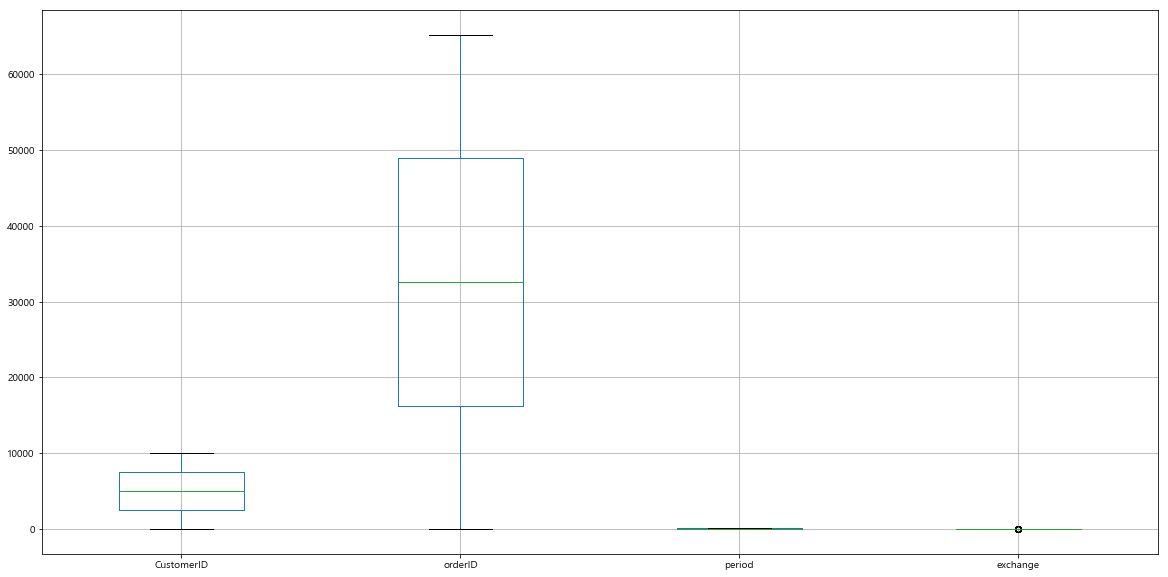

In [7]:
# 상자 수염도를 이용하여 연속형 데이터의 이상치 확인
ds_hmeq_numeric.boxplot(figsize=(20,10))

In [8]:
#범주형데이터 요약
ds_hmeq_char.describe()

,Item,gender,age,job,marital,province,city,size
count,64514,64514,64514,64514,64514,64514,64514,64514
unique,21,2,5,6,2,7,35,5
top,M,FEMALE,40대,직장인,MARRIED,서울시,서구(광주),S
freq,4143,40218,16990,30066,36447,16148,6043,18591


In [9]:
#연속형 데이터 요약
ds_hmeq_numeric.describe()

,CustomerID,orderID,period,exchange
count,64514.000000,64514.000000,64514.000000,64514.000000
mean,5007.068962,32609.145674,58.892225,3.659215
std,2888.205261,18829.607449,27.151090,1.708862
min,1.000000,1.000000,10.000000,0.000000
25%,2499.000000,16280.250000,33.000000,2.500000
50%,5032.000000,32620.500000,58.000000,3.600000
75%,7514.000000,48945.750000,79.000000,4.900000
max,10000.000000,65195.000000,118.000000,8.900000


Text(0.5,1,'나이')

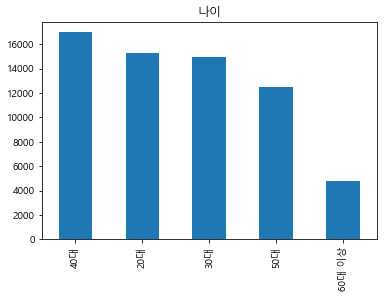

In [10]:
ds_x1 = ds_hmeq_char["age"].value_counts()
ds_x1.sort_values(inplace = True, ascending = False)
ds_x1.plot.bar()
plt.title("나이")

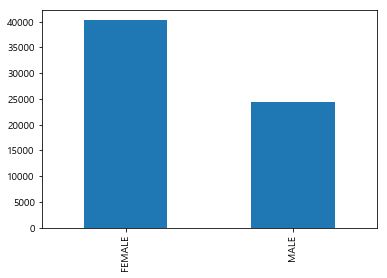

In [12]:
#범주형데이터 bar chart
ds_x1 = ds_hmeq_char["gender"].value_counts()
ds_x1.sort_values(inplace = True, ascending = False)
ds_x1.plot.bar()

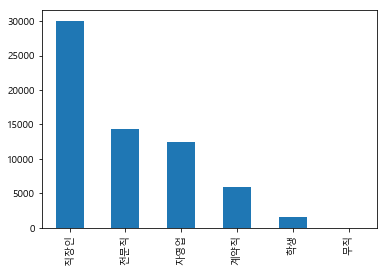

In [13]:
#범주형데이터 bar chart
ds_x1 = ds_hmeq_char["job"].value_counts()
ds_x1.sort_values(inplace = True, ascending = False)
ds_x1.plot.bar()

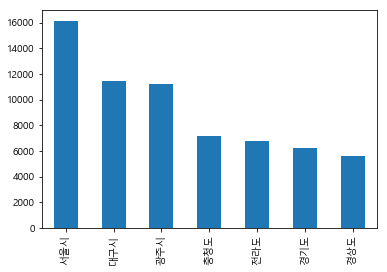

In [14]:
#범주형데이터 bar chart
ds_x1 = ds_hmeq_char["province"].value_counts()
ds_x1.sort_values(inplace = True, ascending = False)
ds_x1.plot.bar()

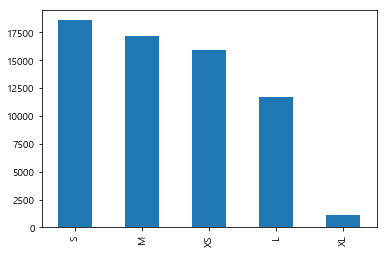

In [15]:
#범주형데이터 bar chart
ds_x1 = ds_hmeq_char["size"].value_counts()
ds_x1.sort_values(inplace = True, ascending = False)
ds_x1.plot.bar()

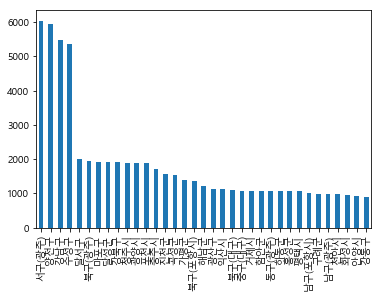

In [17]:
#범주형데이터 bar chart
ds_x1 = ds_hmeq_char["city"].value_counts()
ds_x1.sort_values(inplace = True, ascending = False)
ds_x1.plot.bar()

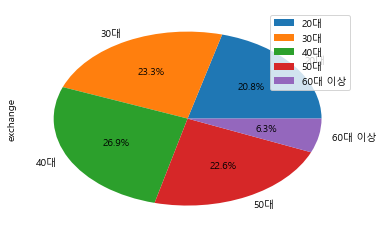

In [19]:
ds_sub = ds_hmeq[ds_hmeq["exchange"]>=3.65]
ds_count = ds_sub.groupby("age",as_index=False).agg("count")
ds_count.plot.pie(y="exchange",labels=ds_count["age"],autopct="%.1f%%")

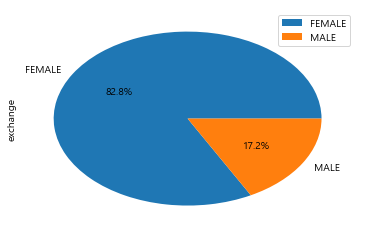

In [20]:
ds_sub = ds_hmeq[ds_hmeq["exchange"]>=3.65]
ds_count = ds_sub.groupby("gender",as_index=False).agg("count")
ds_count.plot.pie(y="exchange",labels=ds_count["gender"],autopct="%.1f%%")

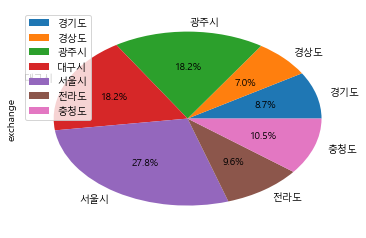

In [21]:
ds_sub = ds_hmeq[ds_hmeq["exchange"]>=3.65]
ds_count = ds_sub.groupby("province",as_index=False).agg("count")
ds_count.plot.pie(y="exchange",labels=ds_count["province"],autopct="%.1f%%")

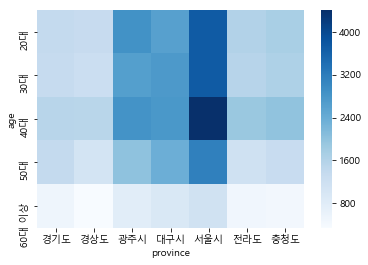

In [22]:
ds_agg = ds_hmeq.groupby(["age","province"], as_index=False).agg("count")
ds_pivot = ds_agg.pivot("age","province","CustomerID")
sns.heatmap(ds_pivot, cmap="Blues")

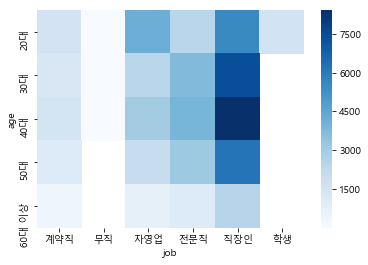

In [23]:
ds_agg = ds_hmeq.groupby(["age","job"], as_index=False).agg("count")
ds_pivot = ds_agg.pivot("age","job","CustomerID")
sns.heatmap(ds_pivot, cmap="Blues")
# 나이별 직종별 쇼핑몰 고객분포도

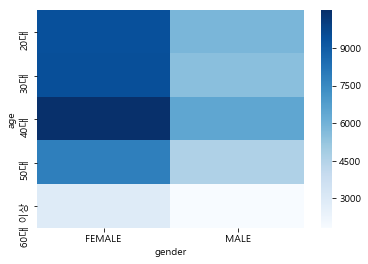

In [24]:
ds_agg = ds_hmeq.groupby(["age","gender"], as_index=False).agg("count")
ds_pivot = ds_agg.pivot("age","gender","CustomerID")
sns.heatmap(ds_pivot, cmap="Blues")

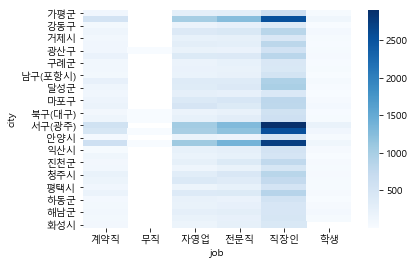

In [25]:
ds_agg = ds_hmeq.groupby(["city","job"], as_index=False).agg("count")
ds_pivot = ds_agg.pivot("city","job","CustomerID")
sns.heatmap(ds_pivot, cmap="Blues")

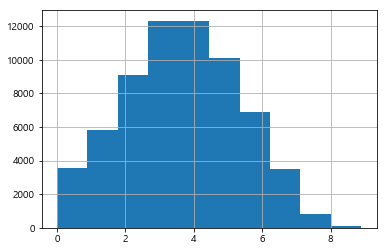

In [26]:
ds_hmeq["exchange"].hist()

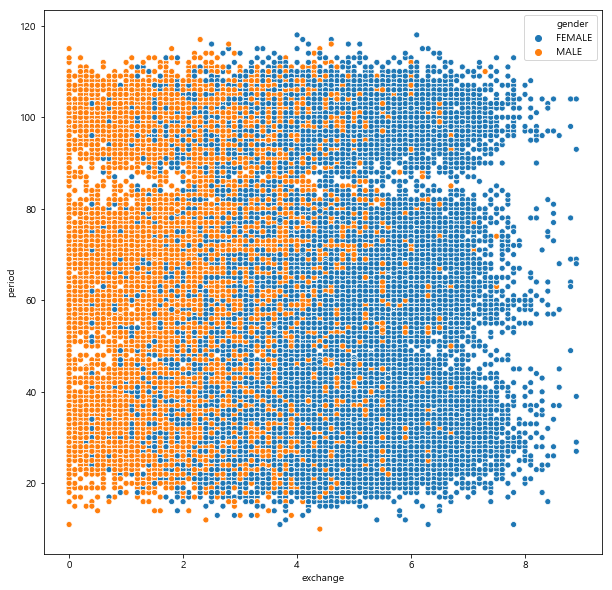

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="exchange",y="period",hue="gender",data=ds_hmeq)

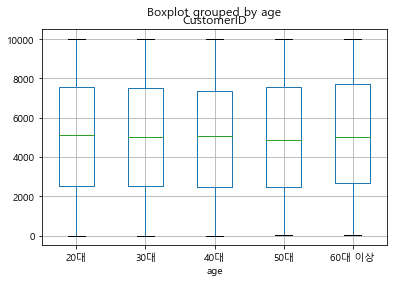

In [28]:
ds_hmeq.boxplot(column="CustomerID",by="age")

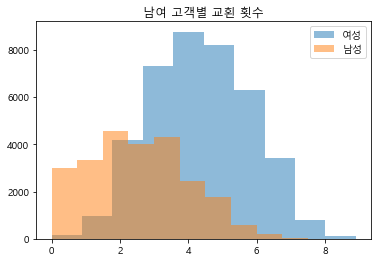

In [30]:
plt.title("남여 고객별 교횐 횟수")
plt.hist(ds_hmeq[ds_hmeq["gender"]=="FEMALE"]["exchange"],label="여성",alpha=0.5)
plt.hist(ds_hmeq[ds_hmeq["gender"]=="MALE"]["exchange"],label="남성",alpha=0.5)
plt.legend()

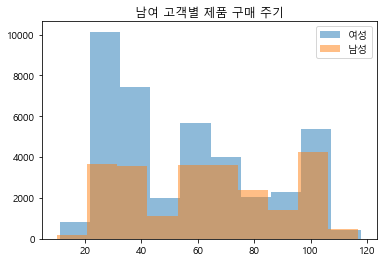

In [33]:
plt.title("남여 고객별 제품 구매 주기")
plt.hist(ds_hmeq[ds_hmeq["gender"]=="FEMALE"]["period"],label="여성",alpha=0.5)
plt.hist(ds_hmeq[ds_hmeq["gender"]=="MALE"]["period"],label="남성",alpha=0.5)
plt.legend()

In [40]:
import pandas as pd
#데이터 전처리
from mlxtend.preprocessing import TransactionEncoder
#지지도 계산
from mlxtend.frequent_patterns import apriori
#연관 규칙
from mlxtend.frequent_patterns import association_rules